# Data Pre-processing

### Step 1 -  Load data and Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import calendar
from datetime import date, timedelta
# import package to ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_csv('df.csv', index_col = 0)
df.columns = df.columns.str.replace(' ', '_')

In [3]:
df.columns

Index(['MLS_No', 'Status', 'Address', 'Unit', 'DOM', 'City', 'LP', 'SP', 'BT',
       'SqFt', 'BR', 'Bth', 'Gar', 'GarSp', 'YrBlt', 'HOA_Fee', 'Freq',
       'Closing_Date', 'Age', 'Area', 'Zip'],
      dtype='object')

### Step 2 - Remove irrelevant columns
We decide to drop irrelevant columns where 'MLS No' and 'Address' are unique of each property, and'Status' and 'City' are same for all properties. And since the type of the values 'Unit' are hard to unify and there are too many missing value for 'Unit', we also decide to drop it.

In [4]:
# we first remove irrelevant columns from our data set
df = df.drop(columns = ['MLS_No', 'Status', 'Address', 'Unit','City'])

### Step 3 - Identify Categorical and Numerical categories 

In [5]:
num = ['DOM', 'LP', 'SP', 'SqFt', 'Age', 'HOA_Fee']

### Step 4 - Convert data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DOM           10000 non-null  int64  
 1   LP            10000 non-null  object 
 2   SP            10000 non-null  object 
 3   BT            10000 non-null  object 
 4   SqFt          10000 non-null  int64  
 5   BR            10000 non-null  int64  
 6   Bth           10000 non-null  int64  
 7   Gar           8103 non-null   object 
 8   GarSp         9990 non-null   float64
 9   YrBlt         9995 non-null   float64
 10  HOA_Fee       6013 non-null   object 
 11  Freq          2658 non-null   object 
 12  Closing_Date  10000 non-null  object 
 13  Age           9990 non-null   float64
 14  Area          10000 non-null  object 
 15  Zip           10000 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 1.3+ MB


In [7]:
# change the type of LP, SP, HOA Fee to numeric
def remove(text):
    return text.replace('$','')
def removedot(text):
    return text.replace(',','')
df['LP'] = pd.to_numeric(df['LP'].apply(remove).apply(removedot))
df['SP'] = pd.to_numeric(df['SP'].apply(remove).apply(removedot))

df['HOA_Fee'] = df['HOA_Fee'].str.replace(',','').apply(float)

# Data Processing

### Step 1 - Check data duplication

In [8]:
#check if there is duplicated line
print('Number of Duplicated rows:',sum(df.duplicated()))

Number of Duplicated rows: 0


### Step 2 - Split data set

In [9]:
# Change closing date to datetime
df['Closing_Date'] = pd.to_datetime(df['Closing_Date'])
df = df.sort_values(by = 'Closing_Date', ignore_index=True)

# pre-split of train and test set, where first 70% of data to train (by closing data) and 30% recent data to test
train = df.iloc[0:7000]
test = df.iloc[7000:].reset_index(drop = True)
train.to_csv('train.csv')
test.to_csv('test.csv')

In [10]:
train

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,HOA_Fee,Freq,Closing_Date,Age,Area,Zip
0,17,769000,759000,CO,1257,2,2,Y,2.0,1999.0,341.0,NaN,2019-01-02,19.0,Santa Teresa,95138
1,0,750000,750000,TH,1444,2,2,Y,2.0,1979.0,350.0,NaN,2019-01-02,39.0,Berryessa,95131
2,7,750000,785000,TH,1655,3,2,Y,2.0,1982.0,445.0,NaN,2019-01-02,36.0,Santa Teresa,95139
3,15,674888,723000,DE,1408,3,3,NaN,0.0,1953.0,NaN,NaN,2019-01-02,65.0,Alum Rock,95127
4,51,649000,636000,CO,922,2,2,NaN,0.0,1988.0,460.0,NaN,2019-01-02,30.0,Campbell,95128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,7,985000,1108000,DE,1260,3,2,Y,2.0,1955.0,NaN,NaN,2020-12-22,65.0,Santa Clara County,95124
6996,4,849000,822000,CO,1622,2,2,Y,2.0,1998.0,726.0,M,2020-12-22,22.0,Central San Jose,95112
6997,1,715000,766000,CO,1168,2,2,Y,2.0,1996.0,260.0,M,2020-12-22,24.0,South San Jose,95136
6998,9,887999,894000,DE,1568,4,2,Y,2.0,1998.0,50.0,M,2020-12-22,22.0,South San Jose,95111


In [11]:
test

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,HOA_Fee,Freq,Closing_Date,Age,Area,Zip
0,12,889500,905000,CO,1464,2,2,Y,2.0,2013.0,210.0,M,2020-12-22,7.0,Berryessa,95132
1,6,799999,935000,DE,1398,4,2,Y,2.0,1971.0,NaN,NaN,2020-12-22,49.0,Evergreen,95148
2,11,799998,860000,DE,1353,3,2,Y,2.0,1971.0,NaN,NaN,2020-12-23,49.0,Alum Rock,95127
3,25,549000,550000,CO,1094,2,2,NaN,0.0,1991.0,463.0,M,2020-12-23,29.0,South San Jose,95122
4,10,949000,985000,DE,1065,3,2,Y,2.0,1971.0,NaN,NaN,2020-12-23,49.0,Blossom Valley,95123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,28,619000,620000,CO,850,2,2,Y,1.0,1992.0,349.0,M,2021-10-08,29.0,Santa Teresa,95138
2996,18,888000,912000,DE,1272,3,2,Y,2.0,1915.0,NaN,NaN,2021-10-08,106.0,Central San Jose,95116
2997,33,739950,735000,CO,1006,2,2,NaN,0.0,1991.0,400.0,M,2021-10-08,30.0,Campbell,95128
2998,5,667053,675000,CO,1233,2,2,Y,1.0,1985.0,535.0,M,2021-10-08,36.0,Blossom Valley,95123


### Step 3 - Process missing data

In [12]:
#Train Data
#Garage - categorize null as a category
train['Gar'] = train['Gar'].fillna('N/A')
#Frequency - convert missing as a category
train['Freq'] = train['Freq'].fillna('N/A')
#Garage Space - drop rows with missing value
#Year Built - drop rows with missing value
train = train.dropna(subset=['GarSp','YrBlt'])

#HOA Fee 
for i in  train.index:
    if math.isnan(train.loc[i,'HOA_Fee']):
        # impute using means for condo and townhouse
        if train.loc[i,'BT'] == 'CO':
            train.loc[i,'HOA_Fee'] = train.loc[train['BT']=='CO','HOA_Fee'].mean()
        if train.loc[i,'BT'] == 'TH':
            train.loc[i,'HOA_Fee'] = train.loc[train['BT']=='TH','HOA_Fee'].mean()
        # input 0 to all other building types 
        else:
            train.loc[i,'HOA_Fee'] = 0

#summarize train data set
print(train.info())
#preview data set
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 0 to 6999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DOM           6990 non-null   int64         
 1   LP            6990 non-null   int64         
 2   SP            6990 non-null   int64         
 3   BT            6990 non-null   object        
 4   SqFt          6990 non-null   int64         
 5   BR            6990 non-null   int64         
 6   Bth           6990 non-null   int64         
 7   Gar           6990 non-null   object        
 8   GarSp         6990 non-null   float64       
 9   YrBlt         6990 non-null   float64       
 10  HOA_Fee       6990 non-null   float64       
 11  Freq          6990 non-null   object        
 12  Closing_Date  6990 non-null   datetime64[ns]
 13  Age           6988 non-null   float64       
 14  Area          6990 non-null   object        
 15  Zip           6990 non-null   object  

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,HOA_Fee,Freq,Closing_Date,Age,Area,Zip
0,17,769000,759000,CO,1257,2,2,Y,2.0,1999.0,341.0,N/A,2019-01-02,19.0,Santa Teresa,95138
1,0,750000,750000,TH,1444,2,2,Y,2.0,1979.0,350.0,N/A,2019-01-02,39.0,Berryessa,95131
2,7,750000,785000,TH,1655,3,2,Y,2.0,1982.0,445.0,N/A,2019-01-02,36.0,Santa Teresa,95139
3,15,674888,723000,DE,1408,3,3,N/A,0.0,1953.0,0.0,N/A,2019-01-02,65.0,Alum Rock,95127
4,51,649000,636000,CO,922,2,2,N/A,0.0,1988.0,460.0,N/A,2019-01-02,30.0,Campbell,95128


In [13]:
test.head()

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,HOA_Fee,Freq,Closing_Date,Age,Area,Zip
0,12,889500,905000,CO,1464,2,2,Y,2.0,2013.0,210.0,M,2020-12-22,7.0,Berryessa,95132
1,6,799999,935000,DE,1398,4,2,Y,2.0,1971.0,NaN,NaN,2020-12-22,49.0,Evergreen,95148
2,11,799998,860000,DE,1353,3,2,Y,2.0,1971.0,NaN,NaN,2020-12-23,49.0,Alum Rock,95127
3,25,549000,550000,CO,1094,2,2,NaN,0.0,1991.0,463.0,M,2020-12-23,29.0,South San Jose,95122
4,10,949000,985000,DE,1065,3,2,Y,2.0,1971.0,NaN,NaN,2020-12-23,49.0,Blossom Valley,95123


In [14]:
#Test Data
#Garage - categorize null as a category
test['Gar'] = test['Gar'].fillna('N/A')
#Frequency - convert missing as a category
test['Freq'] = test['Freq'].fillna('N/A')
#Garage Space - drop rows with missing value
#Year Built - drop rows with missing value
test = test.dropna(subset=['GarSp','YrBlt'])

#HOA Fee 
for i in test.index:
    if math.isnan(test.loc[i,'HOA_Fee']):
        # impute using means for condo and townhouse
        if test.loc[i,'BT'] == 'CO':
            test.loc[i,'HOA_Fee'] = train.loc[train['BT']=='CO','HOA_Fee'].mean()
        if test.loc[i,'BT'] == 'TH':
            test.loc[i,'HOA_Fee'] = train.loc[train['BT']=='TH','HOA_Fee'].mean()
        # input 0 to all other building types 
        else:
            test.loc[i,'HOA_Fee'] = 0
            
#summarize test data set
print(test.info())
#preview data set
test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2996 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DOM           2996 non-null   int64         
 1   LP            2996 non-null   int64         
 2   SP            2996 non-null   int64         
 3   BT            2996 non-null   object        
 4   SqFt          2996 non-null   int64         
 5   BR            2996 non-null   int64         
 6   Bth           2996 non-null   int64         
 7   Gar           2996 non-null   object        
 8   GarSp         2996 non-null   float64       
 9   YrBlt         2996 non-null   float64       
 10  HOA_Fee       2996 non-null   float64       
 11  Freq          2996 non-null   object        
 12  Closing_Date  2996 non-null   datetime64[ns]
 13  Age           2996 non-null   float64       
 14  Area          2996 non-null   object        
 15  Zip           2996 non-null   object  

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,HOA_Fee,Freq,Closing_Date,Age,Area,Zip
0,12,889500,905000,CO,1464,2,2,Y,2.0,2013.0,210.0,M,2020-12-22,7.0,Berryessa,95132
1,6,799999,935000,DE,1398,4,2,Y,2.0,1971.0,0.0,N/A,2020-12-22,49.0,Evergreen,95148
2,11,799998,860000,DE,1353,3,2,Y,2.0,1971.0,0.0,N/A,2020-12-23,49.0,Alum Rock,95127
3,25,549000,550000,CO,1094,2,2,N/A,0.0,1991.0,463.0,M,2020-12-23,29.0,South San Jose,95122
4,10,949000,985000,DE,1065,3,2,Y,2.0,1971.0,0.0,N/A,2020-12-23,49.0,Blossom Valley,95123


### Step 4 - Data Cleaning

In [15]:
# clean zipcode in training set - use the first 5 digits
train['Zip'] = train['Zip'].values.astype(str)
train['Zip'] = train['Zip'].apply(lambda x: x[0:5])

# clean zipcode in testing set - use the first 5 digits
test['Zip'] = test['Zip'].values.astype(str)
test['Zip'] = test['Zip'].apply(lambda x: x[0:5])

In [16]:
# clean BT 
# count the number of occurence for each building type
train.groupby("BT").size()

BT
CO    2459
DE    3328
DU      14
PV       1
TH    1188
dtype: int64

In [17]:
test.groupby("BT").size()

BT
CO    1418
DE     912
DU       3
TH     663
dtype: int64

Remove the row with type "PV" as it only appear once in our dataset and there are not sufficient explanation for what "PV" stands for from Google and consultant.

In [18]:
# drop the row with "PV"
train = train[train["BT"] != "PV"]

In [19]:
# combine "DE" and "DU", label them as "SFH"  as they are both single family house
train["BT"].replace("DE","SFH",inplace = True)
train["BT"].replace("DU","SFH",inplace = True)

test["BT"].replace("DE","SFH",inplace = True)
test["BT"].replace("DU","SFH",inplace = True)

In [20]:
# check how many unique areas we have in San Jose
train['Area'].unique()

array(['Santa Teresa', 'Berryessa', 'Alum Rock', 'Campbell',
       'Blossom Valley', 'Evergreen', 'Cambrian', 'Willow Glen',
       'Central San Jose', 'South San Jose', 'Santa Clara County',
       'Cupertino', 'Almaden Valley', 'Alviso (Santa Clara County)',
       'Santa Clara', 'All Other Counties/States'], dtype=object)

In [21]:
# check the different naming of area (containing San Jose) with same zip code
train.loc[train['Area'].str.contains('San Jose')].groupby(['Zip','Area']).size()

Zip    Area            
95110  Central San Jose    222
95111  South San Jose      480
95112  Central San Jose    382
       South San Jose        8
95113  Central San Jose     24
95116  Central San Jose     68
       South San Jose       28
95121  South San Jose       97
95122  South San Jose      131
95125  South San Jose       27
95126  Central San Jose    196
95128  Central San Jose     93
95131  Central San Jose      1
95136  South San Jose      180
dtype: int64

In [22]:
# check the different naming of area (containing Santa Clara) with same zip code
train.loc[train['Area'].str.contains('Santa Clara')].groupby(['Zip','Area']).size()

Zip    Area                       
95002  Alviso (Santa Clara County)     2
95110  Santa Clara County             16
95111  Santa Clara                     1
       Santa Clara County             33
95112  Santa Clara County             13
95116  Santa Clara County             18
95117  Santa Clara County              3
95118  Santa Clara County              7
95119  Santa Clara County              3
95121  Santa Clara                     1
       Santa Clara County             11
95122  Santa Clara                     3
       Santa Clara County             19
95123  Santa Clara County             36
95124  Santa Clara                     1
       Santa Clara County              3
95125  Santa Clara County             10
95126  Santa Clara                    34
       Santa Clara County              5
95127  Santa Clara                     1
       Santa Clara County             36
95128  Santa Clara                    12
       Santa Clara County              6
95129  Santa Clara Cou

In [23]:
# Unify all area containing Santa Clara to 'Santa Clara County'
train['Area'][train['Area'].str.contains('Santa Clara')] = 'Santa Clara County'
test['Area'][test['Area'].str.contains('Santa Clara')] = 'Santa Clara County'

### Step 5 - Outlier Detection

In [24]:
def outlier_index(array):
    upper = array.mean() + 3*array.std()
    lower = array.mean() - 3*array.std()
    return list(np.where(array > upper)[0]) + list(np.where(array < lower)[0])

In [25]:
for feature in num:
    print('feature '+ feature +' has '+str(len(outlier_index(train[feature]))) + ' outliers')

feature DOM has 141 outliers
feature LP has 0 outliers
feature SP has 1 outliers
feature SqFt has 40 outliers
feature Age has 108 outliers
feature HOA_Fee has 98 outliers


In [26]:
train['Age'].describe()

count    6987.000000
mean       42.794332
std        21.656168
min         0.000000
25%        31.000000
50%        43.000000
75%        53.000000
max       132.000000
Name: Age, dtype: float64

(array([ 644.,  789., 1583., 2172., 1059.,  385.,   97.,  144.,   83.,
          31.]),
 array([  0. ,  13.2,  26.4,  39.6,  52.8,  66. ,  79.2,  92.4, 105.6,
        118.8, 132. ]),
 <BarContainer object of 10 artists>)

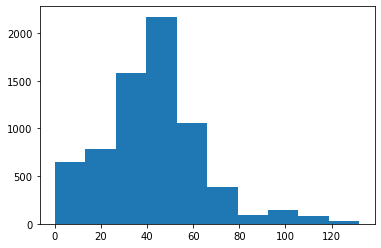

In [27]:
plt.hist(train['Age'])

In [28]:
# move outlier

def outlier_index(array):
    upper = array.mean() + 3*array.std()
    lower = array.mean() - 3*array.std()
    return list(np.where(array > upper)[0]) + list(np.where(array < lower)[0])

train.reset_index(inplace = True,drop = True)

index_set = []
for feature in num:
    print('feature '+ feature +' has '+str(len(outlier_index(train[feature]))) + ' outliers')
    index_set.extend(outlier_index(train[feature]))
    
train.drop(index_set, inplace = True)
train.reset_index(inplace = True,drop = True)

feature DOM has 141 outliers
feature LP has 0 outliers
feature SP has 1 outliers
feature SqFt has 40 outliers
feature Age has 108 outliers
feature HOA_Fee has 98 outliers


# Data Engineering: 

In [29]:
#Age - fill with the time difference in year between YrBlt and Closing Date
train['Age'] = train['Age'].fillna(pd.DatetimeIndex(train['Closing_Date']).year - train['YrBlt'])
test['Age'] = test['Age'].fillna(pd.DatetimeIndex(test['Closing_Date']).year - test['YrBlt'])

In [30]:
# move closing date to 30 ealier as Accept_date
train['Accept_Date'] = train['Closing_Date'] -  pd.to_timedelta(30, unit='d')
test['Accept_Date'] = test['Closing_Date'] -  pd.to_timedelta(30, unit='d')

In [31]:
# extract month and data from closing data
train['Month_Accept_Date'] = train['Accept_Date'].dt.month
test['Month_Accept_Date'] = test['Accept_Date'].dt.month

In [32]:
import math

# write a function to calculate the week number given feature name
def add_week_of_month(df,feature):
    df['Week_in_month_'+feature] = pd.to_numeric(df[feature].dt.day/7)
    df['Week_in_month_'+feature] = df['Week_in_month_'+feature].apply(lambda x: math.ceil(x))
    return df

In [33]:
# create week of month for closing date for train set
train = add_week_of_month(train,'Accept_Date')

In [34]:
# create week of month for closing date for test set
test = add_week_of_month(test,'Accept_Date')

In [35]:
#create listing date
train['Listing_Date'] = train['Closing_Date'] -  pd.to_timedelta(train['DOM'], unit='d')
test['Listing_Date'] = test['Closing_Date'] -  pd.to_timedelta(test['DOM'], unit='d')

In [36]:
# extract month and data from Listing data
train['Month_Listing_Date'] = train['Listing_Date'].dt.month
test['Month_Listing_Date'] = test['Listing_Date'].dt.month
# create week of month for Listing Date 
train = add_week_of_month(train,'Listing_Date')
test = add_week_of_month(test,'Listing_Date')

In [37]:
# change month to abbrieviated month name
train['Month_Accept_Date'] = train['Month_Accept_Date'].apply(lambda x: calendar.month_abbr[x])
train['Month_Listing_Date'] = train['Month_Listing_Date'].apply(lambda x: calendar.month_abbr[x])
test['Month_Accept_Date'] = test['Month_Accept_Date'].apply(lambda x: calendar.month_abbr[x])
test['Month_Listing_Date'] = test['Month_Listing_Date'].apply(lambda x: calendar.month_abbr[x])

In [38]:
train

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,...,Closing_Date,Age,Area,Zip,Accept_Date,Month_Accept_Date,Week_in_month_Accept_Date,Listing_Date,Month_Listing_Date,Week_in_month_Listing_Date
0,17,769000,759000,CO,1257,2,2,Y,2.0,1999.0,...,2019-01-02,19.0,Santa Teresa,95138,2018-12-03,Dec,1,2018-12-16,Dec,3
1,0,750000,750000,TH,1444,2,2,Y,2.0,1979.0,...,2019-01-02,39.0,Berryessa,95131,2018-12-03,Dec,1,2019-01-02,Jan,1
2,7,750000,785000,TH,1655,3,2,Y,2.0,1982.0,...,2019-01-02,36.0,Santa Teresa,95139,2018-12-03,Dec,1,2018-12-26,Dec,4
3,15,674888,723000,SFH,1408,3,3,N/A,0.0,1953.0,...,2019-01-02,65.0,Alum Rock,95127,2018-12-03,Dec,1,2018-12-18,Dec,3
4,51,649000,636000,CO,922,2,2,N/A,0.0,1988.0,...,2019-01-02,30.0,Campbell,95128,2018-12-03,Dec,1,2018-11-12,Nov,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6611,7,985000,1108000,SFH,1260,3,2,Y,2.0,1955.0,...,2020-12-22,65.0,Santa Clara County,95124,2020-11-22,Nov,4,2020-12-15,Dec,3
6612,4,849000,822000,CO,1622,2,2,Y,2.0,1998.0,...,2020-12-22,22.0,Central San Jose,95112,2020-11-22,Nov,4,2020-12-18,Dec,3
6613,1,715000,766000,CO,1168,2,2,Y,2.0,1996.0,...,2020-12-22,24.0,South San Jose,95136,2020-11-22,Nov,4,2020-12-21,Dec,3
6614,9,887999,894000,SFH,1568,4,2,Y,2.0,1998.0,...,2020-12-22,22.0,South San Jose,95111,2020-11-22,Nov,4,2020-12-13,Dec,2


In [39]:
test

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,...,Closing_Date,Age,Area,Zip,Accept_Date,Month_Accept_Date,Week_in_month_Accept_Date,Listing_Date,Month_Listing_Date,Week_in_month_Listing_Date
0,12,889500,905000,CO,1464,2,2,Y,2.0,2013.0,...,2020-12-22,7.0,Berryessa,95132,2020-11-22,Nov,4,2020-12-10,Dec,2
1,6,799999,935000,SFH,1398,4,2,Y,2.0,1971.0,...,2020-12-22,49.0,Evergreen,95148,2020-11-22,Nov,4,2020-12-16,Dec,3
2,11,799998,860000,SFH,1353,3,2,Y,2.0,1971.0,...,2020-12-23,49.0,Alum Rock,95127,2020-11-23,Nov,4,2020-12-12,Dec,2
3,25,549000,550000,CO,1094,2,2,N/A,0.0,1991.0,...,2020-12-23,29.0,South San Jose,95122,2020-11-23,Nov,4,2020-11-28,Nov,4
4,10,949000,985000,SFH,1065,3,2,Y,2.0,1971.0,...,2020-12-23,49.0,Blossom Valley,95123,2020-11-23,Nov,4,2020-12-13,Dec,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,28,619000,620000,CO,850,2,2,Y,1.0,1992.0,...,2021-10-08,29.0,Santa Teresa,95138,2021-09-08,Sep,2,2021-09-10,Sep,2
2996,18,888000,912000,SFH,1272,3,2,Y,2.0,1915.0,...,2021-10-08,106.0,Central San Jose,95116,2021-09-08,Sep,2,2021-09-20,Sep,3
2997,33,739950,735000,CO,1006,2,2,N/A,0.0,1991.0,...,2021-10-08,30.0,Campbell,95128,2021-09-08,Sep,2,2021-09-05,Sep,1
2998,5,667053,675000,CO,1233,2,2,Y,1.0,1985.0,...,2021-10-08,36.0,Blossom Valley,95123,2021-09-08,Sep,2,2021-10-03,Oct,1


In [40]:
train.groupby('Age').size()

Age
0.0      53
1.0      24
2.0      31
3.0      66
4.0      41
         ..
103.0     2
104.0     3
105.0    11
106.0     2
107.0     4
Length: 108, dtype: int64

In [41]:
train.to_csv('train.csv')
test.to_csv('test.csv')

In [42]:
test.columns

Index(['DOM', 'LP', 'SP', 'BT', 'SqFt', 'BR', 'Bth', 'Gar', 'GarSp', 'YrBlt',
       'HOA_Fee', 'Freq', 'Closing_Date', 'Age', 'Area', 'Zip', 'Accept_Date',
       'Month_Accept_Date', 'Week_in_month_Accept_Date', 'Listing_Date',
       'Month_Listing_Date', 'Week_in_month_Listing_Date'],
      dtype='object')

In [43]:
train.columns

Index(['DOM', 'LP', 'SP', 'BT', 'SqFt', 'BR', 'Bth', 'Gar', 'GarSp', 'YrBlt',
       'HOA_Fee', 'Freq', 'Closing_Date', 'Age', 'Area', 'Zip', 'Accept_Date',
       'Month_Accept_Date', 'Week_in_month_Accept_Date', 'Listing_Date',
       'Month_Listing_Date', 'Week_in_month_Listing_Date'],
      dtype='object')

In [44]:
train

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,...,Closing_Date,Age,Area,Zip,Accept_Date,Month_Accept_Date,Week_in_month_Accept_Date,Listing_Date,Month_Listing_Date,Week_in_month_Listing_Date
0,17,769000,759000,CO,1257,2,2,Y,2.0,1999.0,...,2019-01-02,19.0,Santa Teresa,95138,2018-12-03,Dec,1,2018-12-16,Dec,3
1,0,750000,750000,TH,1444,2,2,Y,2.0,1979.0,...,2019-01-02,39.0,Berryessa,95131,2018-12-03,Dec,1,2019-01-02,Jan,1
2,7,750000,785000,TH,1655,3,2,Y,2.0,1982.0,...,2019-01-02,36.0,Santa Teresa,95139,2018-12-03,Dec,1,2018-12-26,Dec,4
3,15,674888,723000,SFH,1408,3,3,N/A,0.0,1953.0,...,2019-01-02,65.0,Alum Rock,95127,2018-12-03,Dec,1,2018-12-18,Dec,3
4,51,649000,636000,CO,922,2,2,N/A,0.0,1988.0,...,2019-01-02,30.0,Campbell,95128,2018-12-03,Dec,1,2018-11-12,Nov,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6611,7,985000,1108000,SFH,1260,3,2,Y,2.0,1955.0,...,2020-12-22,65.0,Santa Clara County,95124,2020-11-22,Nov,4,2020-12-15,Dec,3
6612,4,849000,822000,CO,1622,2,2,Y,2.0,1998.0,...,2020-12-22,22.0,Central San Jose,95112,2020-11-22,Nov,4,2020-12-18,Dec,3
6613,1,715000,766000,CO,1168,2,2,Y,2.0,1996.0,...,2020-12-22,24.0,South San Jose,95136,2020-11-22,Nov,4,2020-12-21,Dec,3
6614,9,887999,894000,SFH,1568,4,2,Y,2.0,1998.0,...,2020-12-22,22.0,South San Jose,95111,2020-11-22,Nov,4,2020-12-13,Dec,2
